# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Rifialdi Faturrochman
- **Email:** rifialdi.faturrochman@gmail.com
- **ID Dicoding:** rifialdiif

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang menyumbang pendapatan tertinggi, dan apakah kategori tersebut memiliki tingkat kepuasan pelanggan (review score) yang baik?
- Bagaimana distribusi geografis pelanggan berdasarkan negara bagian (state), dan apakah ada korelasi antara lokasi pelanggan dengan lama waktu pengiriman (delivery time)?
- Bagaimana profil pelanggan berdasarkan segmentasi RFM (Recency, Frequency, Monetary) untuk menentukan strategi marketing yang personal?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import Semua Library yang Dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


## Data Wrangling

### Gathering Data

In [2]:
# Base URL untuk raw content dari GitHub
base_url = "https://raw.githubusercontent.com/rifialdiif/AnalisisData_E-Commerce/main/data/"

# Memuat semua dataset
customers_df = pd.read_csv(base_url + "customers_dataset.csv")
geolocation_df = pd.read_csv(base_url + "geolocation_dataset.csv")
order_items_df = pd.read_csv(base_url + "order_items_dataset.csv")
order_payments_df = pd.read_csv(base_url + "order_payments_dataset.csv")
order_reviews_df = pd.read_csv(base_url + "order_reviews_dataset.csv")
orders_df = pd.read_csv(base_url + "orders_dataset.csv")
product_category_df = pd.read_csv(base_url + "products_dataset.csv")
sellers_df = pd.read_csv(base_url + "sellers_dataset.csv")
category_translation_df = pd.read_csv(base_url + "product_category_name_translation.csv")

In [3]:
# Memuat tabel customers
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# Memuat tabel orders
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
# Memuat tabel order_items
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
# Memuat tabel order_payments
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
# Memuat tabel order_reviews
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
# Memuat tabel products
product_category_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
# Memuat tabel sellers
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [10]:
# Memuat tabel geolocation
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
# Memuat tabel category_translation
category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Kompleksitas Data Relasional: Setelah melihat sekilas isi dari masing-masing tabel, terlihat bahwa dataset ini memiliki struktur relasional yang cukup kompleks. Data terbagi ke dalam 9 file yang saling terhubung melalui kunci unik (seperti customer_id, order_id, dan product_id). Ini artinya, kita harus melakukan penggabungan (merge) yang teliti agar tidak ada data yang hilang saat proses analisis nanti.

- Tantangan Format Waktu: Pada tabel orders_df, kolom-kolom penting seperti waktu pembelian, pengiriman, hingga estimasi kedatangan masih terbaca sebagai objek (string). Supaya kita bisa menghitung durasi pengiriman atau melihat tren bulanan, kolom-kolom ini wajib dikonversi menjadi tipe data datetime.

- Kendala Bahasa pada Kategori: Nama kategori produk di tabel utama masih menggunakan bahasa Portugis (contoh: beleza_saude). Kita sangat membutuhkan tabel product_category_name_translation agar visualisasi akhir nanti menggunakan bahasa Inggris yang lebih universal dan mudah dipahami oleh reviewer atau stakeholder.

- Anomali pada Ulasan (Reviews): Di tabel ulasan, banyak sekali kolom komentar yang kosong (NaN). Namun, kolom skor ulasan (review_score) terlihat cukup lengkap. Untuk menjawab pertanyaan bisnis, kita akan lebih berfokus pada skor numeriknya daripada teks komentarnya.

- Identitas Pelanggan: Ada hal menarik di tabel pelanggan, yaitu perbedaan antara customer_id dan customer_unique_id. Untuk analisis loyalitas (RFM), kita harus menggunakan customer_unique_id karena itulah identitas asli satu orang pelanggan meskipun mereka belanja berkali-kali.

### Assessing Data

1. Memeriksa Tabel Customers

In [12]:
# Cek struktur kolom dan tipe data, pastiin ID terbaca benar
customers_df.info()

# Cek duplikasi
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

# Lihat persebaran missing values
customers_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah duplikasi:  0


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


2. Memeriksa Tabel Orders (Fokus ke Timestamps)

In [13]:
# Kolom tanggal biasanya masih berupa string/object
orders_df.info()

# Cek data kosong—biasanya di tanggal pengiriman karena status pesanan beda-beda
print("\nJumlah missing values:\n", orders_df.isna().sum())

print("\nJumlah duplikasi: ", orders_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

Jumlah missing values:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_del

3. Memeriksa Tabel Order Items

In [14]:
# Cek harga dan ongkir, pastikan tipe float agar bisa dihitung
order_items_df.info()

print("\nJumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

Jumlah duplikasi:  0


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


4. Memeriksa Tabel Products

In [15]:
product_category_df.info()

print("\nJumlah duplikasi: ",product_category_df.duplicated().sum())
# Cek seberapa banyak kolom missing
product_category_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

Jumlah duplikasi:  0


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


6. Memeriksa Tabel Order Payments

In [16]:
order_payments_df.info()

print("\nDuplikasi data pembayaran: ", order_payments_df.duplicated().sum())

# Cek seberapa banyak kolom missing
order_payments_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

Duplikasi data pembayaran:  0


,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


7. Memeriksa Tabel Geolocation (Data Spasial)

In [17]:
geolocation_df.info()

# Cek duplikasi
print("Jumlah duplikasi di data geo: ", geolocation_df.duplicated().sum())

geolocation_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
Jumlah duplikasi di data geo:  261831


,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


8. Memeriksa Tabel Sellers

In [18]:
# Cek asal kota seller
sellers_df.info()

print("\nJumlah duplikasi seller: ", sellers_df.duplicated().sum())
sellers_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

Jumlah duplikasi seller:  0


,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


9. Memeriksa Tabel Category Translation

In [19]:
category_translation_df.info()

# Pastiin tidak ada nama kategori yang dobel atau kosong
print("\nJumlah duplikasi: ", category_translation_df.duplicated().sum())
category_translation_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB

Jumlah duplikasi:  0


,0
product_category_name,0
product_category_name_english,0


**Insight:**
- Ketidaksesuaian Tipe Data (Data Type Mismatch):
Sebagian besar kolom yang menyimpan informasi waktu pada tabel orders_df (seperti order_purchase_timestamp, order_delivered_customer_date, dll) masih terdeteksi sebagai tipe data object (string). Hal ini memerlukan konversi ke tipe datetime di tahap pembersihan agar analisis tren waktu, perhitungan lead time pengiriman, dan analisis Recency pada RFM dapat dilakukan secara akurat.

- Kehilangan Data pada Kategori Produk (Missing Values):
Tabel products_df memiliki 610 baris yang kehilangan informasi product_category_name. Mengingat salah satu tujuan utama proyek ini adalah menganalisis performa kategori, data ini perlu ditangani agar tidak mengaburkan hasil perhitungan total pendapatan (revenue) dan rata-rata skor ulasan per kategori.

- Logika Data Pengiriman yang Kosong:
Terdapat nilai kosong (null) pada kolom order_delivered_customer_date di tabel orders_df. Secara objektif, ini mengindikasikan adanya pesanan yang belum sampai ke pelanggan (kemungkinan statusnya masih shipped, processing, atau canceled). Data ini perlu difilter di tahap analisis logistik agar perhitungan durasi pengiriman tidak menghasilkan nilai yang bias atau eror.

- Redundansi pada Data Geolocation:
Tabel geolocation_df menunjukkan tingkat duplikasi yang sangat tinggi (banyak koordinat untuk satu zip code yang sama). Hal ini merupakan karakteristik umum pada data spasial mentah, namun perlu dilakukan reduksi data agar proses visualisasi peta pada dashboard Streamlit nantinya menjadi lebih ringan dan responsif.

- Perbedaan Identitas Pelanggan:
Terdapat perbedaan antara customer_id (ID per transaksi) dan customer_unique_id (ID per individu). Untuk analisis perilaku jangka panjang seperti Frequency dan Monetary dalam segmentasi RFM, penggunaan customer_unique_id bersifat wajib guna mengidentifikasi pelanggan yang melakukan pembelian berulang (repeat order).

- Ketersediaan Data Kepuasan Pelanggan:
Meskipun banyak data teks (judul dan pesan ulasan) yang kosong pada order_reviews_df, kolom numerik review_score terisi dengan sangat baik. Hal ini memungkinkan kita untuk tetap menjalankan analisis korelasi antara performa produk dan kepuasan pelanggan secara kuantitatif.

### Cleaning Data

1. Konversi Tipe Data ke Datetime

In [20]:
# Mengonversi kolom tanggal di tabel orders menjadi tipe datetime
datetime_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

# Mengonversi kolom tanggal di tabel order_items
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])

2. Filtrasi Status Pesanan & Penanganan Missing Values

In [21]:
# Memfilter hanya pesanan yang sudah terkirim (delivered)
orders_df = orders_df[orders_df["order_status"] == "delivered"]

# Mengisi nama kategori produk yang kosong dengan 'others'
product_category_df["product_category_name"].fillna(value="others", inplace=True)

# Membersihkan data geolocation dari duplikasi untuk efisiensi memori
geolocation_df.drop_duplicates(inplace=True)
geolocation_df = geolocation_df.groupby('geolocation_zip_code_prefix').sample(1)

/tmp/ipython-input-1012937213.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  product_category_df["product_category_name"].fillna(value="others", inplace=True)


3. Penggabungan Seluruh Tabel (Data Merging)

In [22]:
# 1. Menggabungkan orders dengan customers
all_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

# 2. Menggabungkan dengan order_items dan sellers
all_df = pd.merge(all_df, order_items_df, on="order_id", how="left")
all_df = pd.merge(all_df, sellers_df, on="seller_id", how="left")

# 3. Menggabungkan dengan produk dan kategorinya
all_df = pd.merge(all_df, product_category_df, on="product_id", how="left")
all_df = pd.merge(all_df, category_translation_df, on="product_category_name", how="left")

# 4. Menggabungkan dengan ulasan (reviews) dan pembayaran (payments)
all_df = pd.merge(all_df, order_reviews_df, on="order_id", how="left")
all_df = pd.merge(all_df, order_payments_df, on="order_id", how="left")

4. Pembersihan Pasca Penggabungan

In [23]:
# Menggunakan nama kategori bahasa Inggris jika tersedia, jika tidak tetap gunakan aslinya
all_df["product_category_name_english"] = all_df["product_category_name_english"].fillna(all_df["product_category_name"])

# Menghapus kolom yang tidak lagi dibutuhkan untuk analisis agar ukuran file lebih ringan
all_df.drop(columns=["product_category_name"], inplace=True)

# Memastikan tidak ada data duplikat setelah proses merging
all_df.drop_duplicates(inplace=True)

5. Ekspor Data ke CSV

In [24]:
# Menyimpan data yang sudah bersih ke dalam format CSV
all_df.to_csv("main_data.csv", index=False)

In [28]:
# Mengatur agar Pandas menampilkan seluruh kolom tanpa dipotong (truncated)
pd.set_option('display.max_columns', None)

# Menampilkan 5 baris pertama dari dataframe hasil penggabungan
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570,belo horizonte,SP,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840,guariba,SP,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,credit_card,3.0,179.12


**Insight:**
- Akurasi Operasional: Melalui filtrasi status delivered, data yang kini tersedia hanya mencakup transaksi yang benar-benar tuntas. Hal ini menjamin bahwa perhitungan durasi pengiriman dan skor ulasan nantinya mencerminkan realitas operasional yang valid.

- Standardisasi Analisis Waktu: Konversi seluruh kolom tanggal ke format datetime telah menghilangkan hambatan teknis untuk melakukan analisis tren bulanan, analisis musiman, maupun perhitungan komponen Recency pada segmentasi RFM.

- Integritas Volume Data: Penanganan nilai kosong pada kategori produk dengan label "others" memastikan bahwa tidak ada nilai pendapatan (revenue) yang terbuang saat melakukan pengelompokan data berdasarkan kategori di tahap EDA.

- Efisiensi Sumber Data: Penggabungan seluruh tabel menjadi satu berkas main_data.csv menciptakan sumber data tunggal (Single Source of Truth). Hal ini tidak hanya mempermudah proses analisis, tetapi juga secara signifikan mempercepat waktu pemuatan (loading time) aplikasi dashboard Streamlit nantinya.

## Exploratory Data Analysis (EDA)

1. Eksplorasi Statistik Deskriptif all_df

In [29]:
# Melihat rangkuman parameter statistik untuk data numerik
all_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
count,115723,115723,115723,115723,115708,115721,115715,115723,115723,115723.000000,115723,115723,115723.000000,115723,115723,115723,115723.000000,115723.00000,115723.00000,115723,115723,114085.000000,114085.000000,114085.000000,115703.000000,115703.000000,115703.000000,115703.000000,115723,114862,114862.000000,13584,48095,114862,114862,115720.000000,115720,115720.000000,115720.000000
unique,96478,96478,1,NaN,NaN,NaN,NaN,NaN,93358,NaN,4085,27,NaN,32216,2970,NaN,NaN,NaN,NaN,595,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74,95647,NaN,4365,34439,627,95493,NaN,4,NaN,NaN
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,NaN,NaN,NaN,NaN,NaN,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,NaN,NaN,NaN,NaN,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table,eef5dbca8d37dfce6db7d7b16dd0525e,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-08-17 22:17:55,NaN,credit_card,NaN,NaN
freq,63,63,115723,NaN,NaN,NaN,NaN,NaN,75,NaN,18299,48816,NaN,529,2116,NaN,NaN,NaN,NaN,28648,82566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11814,63,NaN,494,259,534,63,NaN,85372,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 09:55:44.254227712,2017-12-31 21:21:18.761848832,2018-01-03 16:51:13.936606208,2018-01-12 21:28:02.115793152,2018-01-24 06:03:00.866378752,NaN,35079.679519,NaN,NaN,1.197048,NaN,NaN,2018-01-07 00:34:36.918434560,119.911096,19.98140,24454.55110,NaN,NaN,48.802673,784.854871,2.206408,2105.660303,30.239173,16.579881,23.065046,NaN,NaN,4.080488,NaN,NaN,NaN,NaN,1.091272,NaN,2.940572,171.810794
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,NaN,1003.000000,NaN,NaN,1.000000,NaN,NaN,2016-09-19 23:11:33,0.850000,0.00000,1001.00000,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,2017-09-12 18:16:08,2017-09-13 03:36:11.750000128,2017-09-14 22:57:45,2017-09-22 22:27:34.500000,2017-10-04 00:00:00,NaN,11310.000000,NaN,NaN,1.000000,NaN,NaN,2017-09-19 19:27:57.500000,39.900000,13.08000,6429.00000,NaN,NaN,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,60.850000
50%,NaN,NaN,NaN,2018-01-18 21:40:03,2018-01-19 10:55:43,2018-01-23 17:36:51,2018-02-01 11:07:13,2018-02-15 00:00:00,NaN,24320.000000,NaN,NaN,1.000000,NaN,NaN,2018-01-25 16:59:48,74.900000,16.28000,13660.00000,NaN,NaN,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,1.000000,NaN,2.000000,108.110000
75%,NaN,NaN,NaN,2018-05-04 10:29:14,2018-05-04 17:10:04,2018-05-07 16:31:00,2018-05-15 00:17:16.500000,2018-05-25 00:00:00,NaN,58805.500000,NaN,NaN,1.000000,NaN,NaN,2018-05-10 10:53:03.500000,132.900000,21.16000,27930.00000,NaN,NaN,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,1.000000,NaN,4.000000,188.940000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN,99980.000000,NaN,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.68000,99730.00000,NaN,NaN,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118

2. Explore Performa Produk dan Kategori

Eksplorasi ini bertujuan untuk mengidentifikasi kategori produk yang memberikan kontribusi pendapatan terbesar dan bagaimana tingkat kepuasan pelanggan pada kategori tersebut.

In [30]:
# Mengelompokkan data berdasarkan kategori produk untuk melihat total pendapatan dan rata-rata rating
product_performance = all_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price": "sum",
    "review_score": "mean"
}).sort_values(by="price", ascending=False)

# Menampilkan 10 kategori produk dengan pendapatan tertinggi
product_performance.head(10)

,order_id,price,review_score
product_category_name_english,,,
health_beauty,8647,1275776.49,4.185333
watches_gifts,5495,1214620.45,4.069629
bed_bath_table,9272,1092461.20,3.915276
sports_leisure,7530,995980.76,4.164606
computers_accessories,6530,926557.43,3.988520
furniture_decor,6307,753082.79,3.960154
housewares,5743,650395.78,4.116578
cool_stuff,3559,636631.49,4.188272
auto,3810,604295.84,4.113380


3. Explore Persebaran Pelanggan dan Waktu Pengiriman

Eksplorasi dilakukan untuk membedah distribusi pelanggan di berbagai negara bagian serta mengukur efisiensi logistik melalui perhitungan durasi pengiriman.

In [31]:
# Menghitung durasi pengiriman dalam satuan hari
all_df['delivery_time'] = (all_df['order_delivered_customer_date'] - all_df['order_purchase_timestamp']).dt.days

# Melihat rata-rata durasi pengiriman dan jumlah pelanggan per negara bagian (state)
delivery_performance = all_df.groupby(by="customer_state").agg({
    "customer_id": "nunique",
    "delivery_time": "mean"
}).sort_values(by="customer_id", ascending=False)

delivery_performance.head(10)

,customer_id,delivery_time
customer_state,,
SP,40501,8.274212
RJ,12350,14.774444
MG,11354,11.498592
RS,5345,14.703888
PR,4923,11.523074
SC,3546,14.509790
BA,3256,18.734684
DF,2080,12.501430
ES,1995,15.235116


4. Explore Metode Pembayaran dan Perilaku Pelanggan

Menganalisis bagaimana pelanggan melakukan transaksi untuk memahami preferensi metode pembayaran yang paling mendominasi.

In [32]:
# Menghitung frekuensi penggunaan setiap metode pembayaran
payment_analysis = all_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="order_id", ascending=False)

payment_analysis

,order_id,payment_value
payment_type,,
credit_card,74304,15268681.44
boleto,19191,3966153.08
voucher,3679,399426.07
debit_card,1485,247684.48


**Insight:**
- Dominasi Kategori Produk: Kategori health_beauty merupakan penyumbang pendapatan terbesar dengan tingkat kepuasan pelanggan yang sangat baik (rata-rata skor ulasan 4.18). Meskipun kategori bed_bath_table memiliki volume pesanan tertinggi, total pendapatannya masih berada di bawah kategori health_beauty dan watches_gifts.

- Sentralisasi Pasar di Sao Paulo (SP): Negara bagian Sao Paulo merupakan pusat aktivitas bisnis dengan jumlah pelanggan mencapai lebih dari 40.000 jiwa. Selain menjadi pasar terbesar, SP juga memiliki rata-rata waktu pengiriman paling efisien, yaitu sekitar 8 hari, jauh lebih cepat dibandingkan wilayah lain seperti Bahia (BA) yang mencapai 18 hari.

- Efisiensi Logistik vs Lokasi: Terlihat adanya korelasi antara kedekatan wilayah dengan kecepatan pengiriman. Wilayah dengan konsentrasi pelanggan tinggi cenderung memiliki infrastruktur logistik yang lebih mapan, sehingga durasi pengiriman menjadi lebih singkat.

- Preferensi Metode Pembayaran: Kartu kredit (credit card) mendominasi transaksi baik dari segi jumlah pesanan maupun total nilai pembayaran. Hal ini menunjukkan bahwa pelanggan lebih menyukai fleksibilitas pembayaran, disusul oleh metode boleto sebagai alternatif kedua yang paling populer.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk apa yang menyumbang pendapatan tertinggi, dan apakah kategori tersebut memiliki tingkat kepuasan pelanggan (review score) yang baik?

Untuk memberikan visualisasi yang objektif, analisis akan difokuskan pada 5 kategori produk dengan pendapatan tertinggi, kemudian melihat bagaimana kualitas ulasan yang diberikan oleh pelanggan pada kategori-kategori tersebut.

/tmp/ipython-input-448360380.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-448360380.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


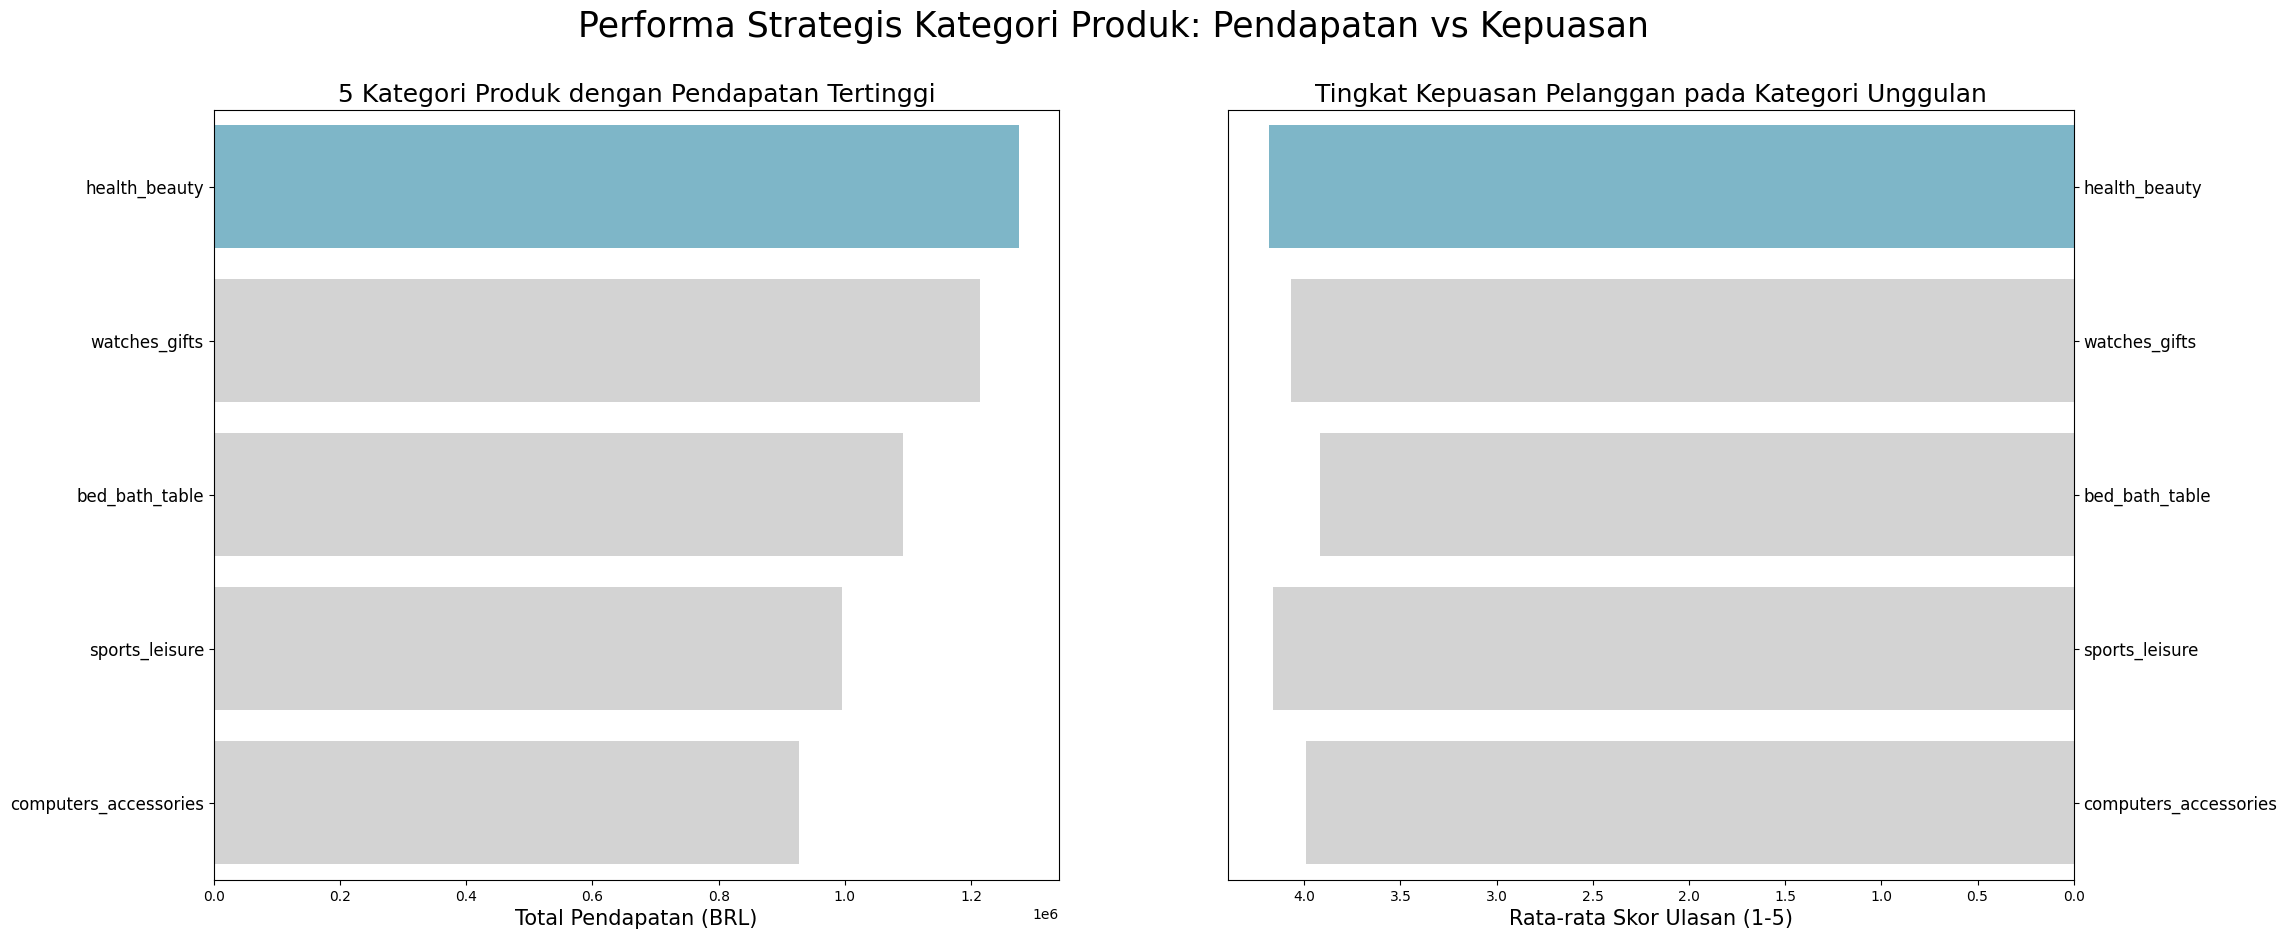

In [33]:
# Menyiapkan data untuk visualisasi
top_5_products = product_performance.head(5).reset_index()

# Membuat figure dengan dua subplot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))

# Visualisasi 1: Total Revenue per Kategori
colors_revenue = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="price",
    y="product_category_name_english",
    data=top_5_products,
    palette=colors_revenue,
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel("Total Pendapatan (BRL)", fontsize=15)
ax[0].set_title("5 Kategori Produk dengan Pendapatan Tertinggi", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=12)

# Visualisasi 2: Rata-rata Review Score per Kategori
colors_rating = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="review_score",
    y="product_category_name_english",
    data=top_5_products,
    palette=colors_rating,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel("Rata-rata Skor Ulasan (1-5)", fontsize=15)
ax[1].invert_xaxis() # Membalik axis agar perbandingan lebih intuitif
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Tingkat Kepuasan Pelanggan pada Kategori Unggulan", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Performa Strategis Kategori Produk: Pendapatan vs Kepuasan", fontsize=25)
plt.show()

**Insight:**
- Pemimpin Pasar: Kategori health_beauty muncul sebagai kontributor pendapatan terbesar. Yang paling signifikan adalah kategori ini juga mencatatkan rata-rata skor ulasan yang tinggi (4.18), mengindikasikan bahwa volume penjualan yang besar diimbangi dengan kualitas produk dan layanan yang memuaskan.

- Anomali pada Bed Bath Table: Meskipun kategori bed_bath_table berada di posisi ketiga dalam perolehan pendapatan, terlihat jelas bahwa skor ulasannya adalah yang paling rendah dibandingkan empat kategori unggulan lainnya. Perusahaan perlu melakukan evaluasi terhadap kualitas produk atau proses pemenuhan pesanan (fulfillment) khusus pada kategori ini untuk mencegah penurunan kepercayaan pelanggan.

- Stabilitas Kategori Premium: Kategori watches_gifts dan sports_leisure menunjukkan kinerja yang sangat konsisten. Keduanya berhasil memberikan kontribusi finansial yang besar dengan tetap mempertahankan reputasi yang baik di mata pelanggan melalui skor ulasan yang kompetitif.

- Kaitan Pendapatan dengan Kepercayaan: Secara keseluruhan, kategori dengan pendapatan tinggi cenderung memiliki skor ulasan di kisaran 4.0. Hal ini membuktikan bahwa kepuasan pelanggan merupakan faktor pendorong utama bagi besarnya volume transaksi di platform ini.

### Pertanyaan 2: Bagaimana distribusi geografis pelanggan berdasarkan negara bagian (state), dan apakah ada korelasi antara lokasi pelanggan dengan lama waktu pengiriman (delivery time)?

/tmp/ipython-input-4075659444.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


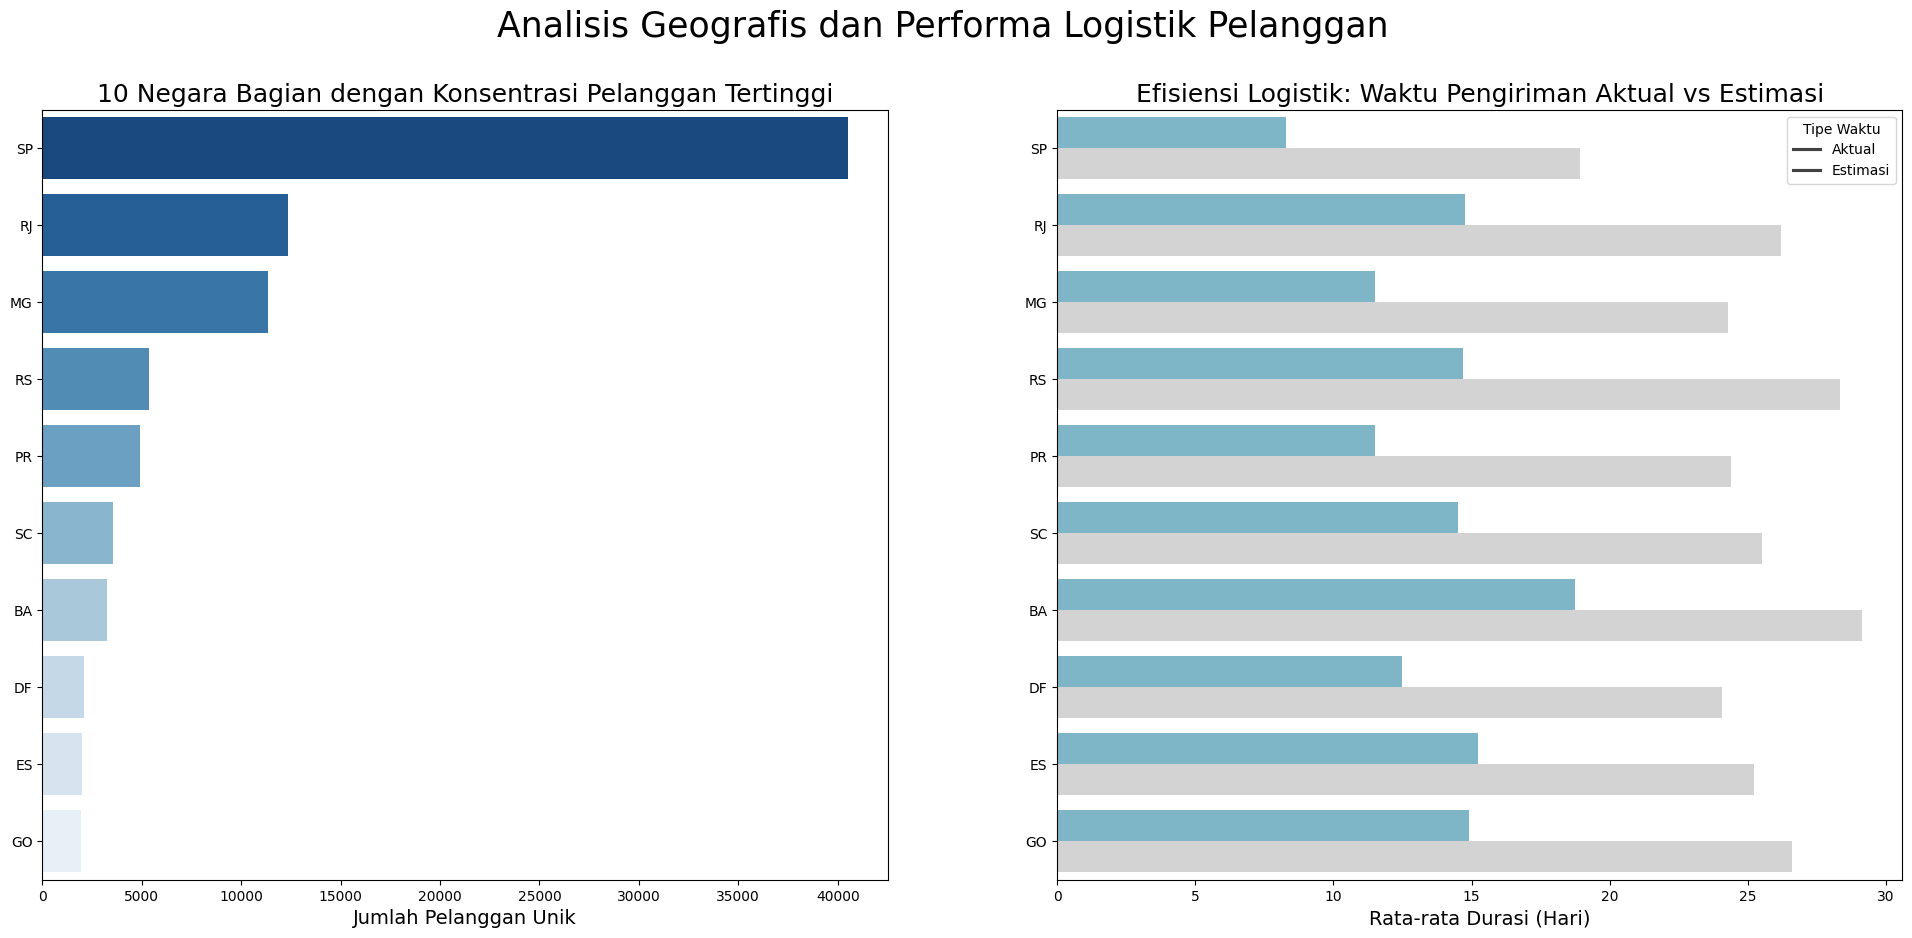

In [34]:
# Menyiapkan data: Menghitung rata-rata waktu pengiriman aktual dan estimasi per state
# Mengambil 10 negara bagian dengan pelanggan terbanyak untuk perbandingan yang relevan
state_performance = all_df.groupby(by="customer_state").agg({
    "customer_id": "nunique",
    "delivery_time": "mean",
    "order_estimated_delivery_date": "first", # Placeholder untuk hitung estimasi
    "order_purchase_timestamp": "first"
}).sort_values(by="customer_id", ascending=False).head(10).reset_index()

# Menghitung rata-rata estimasi pengiriman (dalam hari) untuk perbandingan
all_df['estimated_time'] = (all_df['order_estimated_delivery_date'] - all_df['order_purchase_timestamp']).dt.days
state_est_time = all_df.groupby(by="customer_state")['estimated_time'].mean().reset_index()

# Gabungkan data aktual dan estimasi
state_performance = pd.merge(state_performance, state_est_time, on="customer_state")

# Visualisasi
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))

# Visualisasi 1: Konsentrasi Pelanggan per State
sns.barplot(
    x="customer_id",
    y="customer_state",
    data=state_performance,
    palette="Blues_r",
    ax=ax[0]
)
ax[0].set_title("10 Negara Bagian dengan Konsentrasi Pelanggan Tertinggi", loc="center", fontsize=18)
ax[0].set_xlabel("Jumlah Pelanggan Unik", fontsize=14)
ax[0].set_ylabel(None)

# Visualisasi 2: Efisiensi Pengiriman (Aktual vs Estimasi)
# Mengubah format data agar cocok untuk multi-bar chart
state_melted = state_performance.melt(id_vars='customer_state', value_vars=['delivery_time', 'estimated_time'],
                                      var_name='Time_Type', value_name='Days')

sns.barplot(
    x="Days",
    y="customer_state",
    hue="Time_Type",
    data=state_melted,
    palette=["#72BCD4", "#D3D3D3"],
    ax=ax[1]
)
ax[1].set_title("Efisiensi Logistik: Waktu Pengiriman Aktual vs Estimasi", loc="center", fontsize=18)
ax[1].set_xlabel("Rata-rata Durasi (Hari)", fontsize=14)
ax[1].set_ylabel(None)
ax[1].legend(title="Tipe Waktu", labels=["Aktual", "Estimasi"])

plt.suptitle("Analisis Geografis dan Performa Logistik Pelanggan", fontsize=25)
plt.show()

**Insight:**
- Dominasi Pasar di Sao Paulo (SP): Negara bagian Sao Paulo (SP) memiliki jumlah pelanggan yang sangat timpang jika dibandingkan dengan wilayah lainnya. Sebagai pusat ekonomi, SP menyumbang basis pelanggan terbesar bagi platform. Kabar baiknya, dominasi ini diiringi dengan efisiensi logistik yang sangat tinggi, di mana rata-rata waktu pengiriman aktual hanya berkisar 8 hari—paling cepat di antara wilayah lainnya.

- Performa Pengiriman vs Harapan Pelanggan: Secara keseluruhan, rata-rata waktu pengiriman aktual di 10 negara bagian terbesar selalu lebih cepat dibandingkan dengan estimasi waktu yang diberikan kepada pelanggan. Hal ini merupakan temuan positif karena perusahaan berhasil menerapkan strategi "under-promise, over-deliver", yang secara psikologis dapat meningkatkan kepuasan pelanggan meskipun durasi pengiriman mungkin terasa lama di wilayah tertentu.

- Tantangan Pengiriman di Wilayah Luar Pusat: Terdapat disparitas waktu pengiriman yang cukup terlihat pada wilayah seperti Bahia (BA), yang memiliki rata-rata waktu pengiriman aktual terlama (sekitar 18-19 hari) di antara daftar 10 besar. Meskipun performa tersebut masih di bawah batas estimasi, durasi yang hampir mencapai tiga minggu ini dapat menjadi titik kelemahan jika terdapat kompetitor yang menawarkan logistik lebih cepat di wilayah tersebut.

- Rekomendasi Operasional: Perusahaan disarankan untuk melakukan evaluasi terhadap jalur distribusi ke negara bagian dengan waktu pengiriman lama (seperti BA dan RJ). Penempatan titik distribusi baru atau kerja sama dengan kurir lokal yang lebih ekspres di wilayah tersebut dapat membantu memangkas waktu pengiriman agar mendekati efisiensi yang telah dicapai di wilayah SP.

## Analisis Lanjutan (Opsional) : Bagaimana profil pelanggan berdasarkan segmentasi RFM (Recency, Frequency, Monetary) untuk menentukan strategi marketing yang personal?

In [35]:
# Membuat dataframe RFM
rfm_df = all_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # Mengambil tanggal order terakhir
    "order_id": "nunique",             # Menghitung jumlah order
    "payment_value": "sum"             # Menghitung total belanja
})

# Mengganti nama kolom agar lebih mudah dipahami
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# Menghitung kapan terakhir pelanggan melakukan transaksi (hari)
# Menggunakan tanggal terakhir pada dataset sebagai referensi "hari ini"
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

# Menghapus kolom timestamp yang sudah tidak diperlukan
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

# Menampilkan 5 baris pertama dari dataframe RFM
rfm_df.head()

,customer_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,114
2,0000f46a3911fa3c0805444483337064,1,86.22,537
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,321
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,288


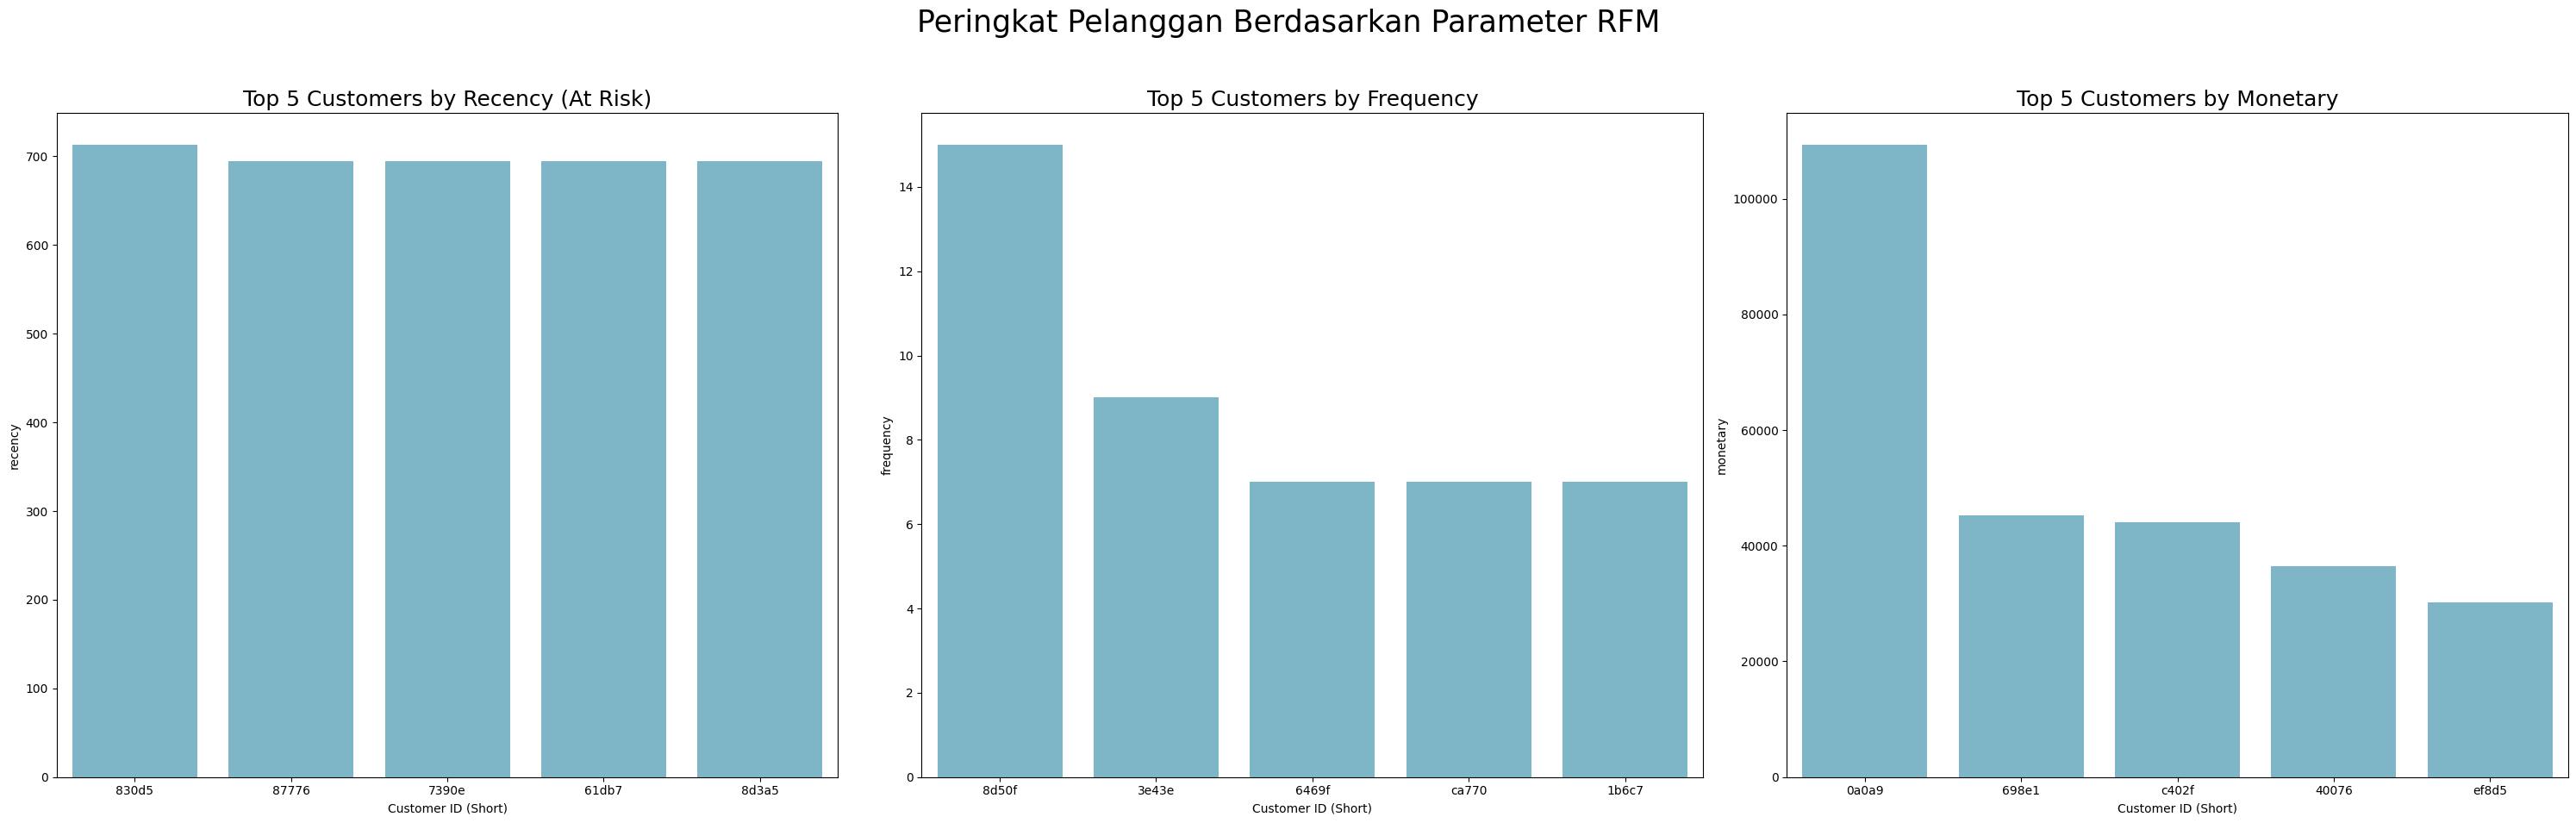

In [48]:
# Membuat salinan agar data asli tetap aman
rfm_viz = rfm_df.copy()
rfm_viz['customer_id_short'] = rfm_viz['customer_id'].str[:5]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
colors = ["#72BCD4"] * 5

# Recency: Menampilkan pelanggan yang paling lama tidak berbelanja (At Risk)
sns.barplot(y="recency", x="customer_id_short",
            data=rfm_viz.sort_values(by="recency", ascending=False).head(5),
            palette=colors, hue="customer_id_short", legend=False, ax=ax[0])
ax[0].set_title("Top 5 Customers by Recency (At Risk)", fontsize=18)
ax[0].set_xlabel("Customer ID (Short)")

# Frequency: Pelanggan paling sering belanja
sns.barplot(y="frequency", x="customer_id_short",
            data=rfm_viz.sort_values(by="frequency", ascending=False).head(5),
            palette=colors, hue="customer_id_short", legend=False, ax=ax[1])
ax[1].set_title("Top 5 Customers by Frequency", fontsize=18)
ax[1].set_xlabel("Customer ID (Short)")

# Monetary: Pelanggan dengan pengeluaran terbesar
sns.barplot(y="monetary", x="customer_id_short",
            data=rfm_viz.sort_values(by="monetary", ascending=False).head(5),
            palette=colors, hue="customer_id_short", legend=False, ax=ax[2])
ax[2].set_title("Top 5 Customers by Monetary", fontsize=18)
ax[2].set_xlabel("Customer ID (Short)")

plt.suptitle("Peringkat Pelanggan Berdasarkan Parameter RFM", fontsize=25)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Agar judul tidak bertabrakan dengan grafik
plt.show()

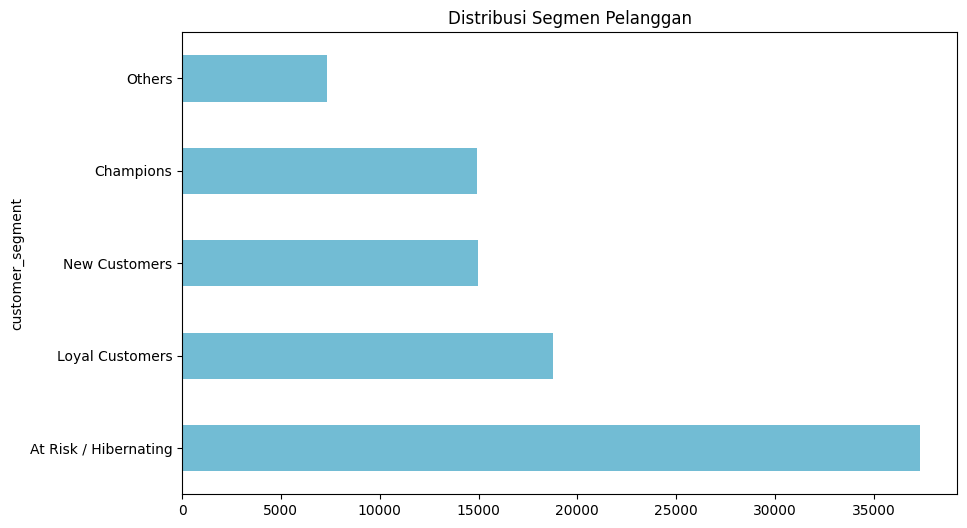

In [45]:
# Membuat scoring 1-5 untuk masing-masing parameter
# Semakin kecil Recency semakin bagus (5), semakin besar F & M semakin bagus (5)
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

# Normalisasi skor ke skala 1-5
def get_score(group):
    return pd.qcut(group.rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

rfm_df['r_score'] = get_score(rfm_df['recency'].mul(-1)) # Recency dibalik
rfm_df['f_score'] = get_score(rfm_df['frequency'])
rfm_df['m_score'] = get_score(rfm_df['monetary'])

# Membuat label segmen sederhana
def segment_customer(df):
    if df['r_score'] >= 4 and df['f_score'] >= 4:
        return 'Champions'
    elif df['r_score'] >= 3 and df['f_score'] >= 3:
        return 'Loyal Customers'
    elif df['r_score'] >= 4 and df['f_score'] <= 2:
        return 'New Customers'
    elif df['r_score'] <= 2:
        return 'At Risk / Hibernating'
    else:
        return 'Others'

rfm_df['customer_segment'] = rfm_df.apply(segment_customer, axis=1)

# Visualisasi Distribusi Segmen
plt.figure(figsize=(10, 6))
rfm_df['customer_segment'].value_counts().plot(kind='barh', color="#72BCD4")
plt.title("Distribusi Segmen Pelanggan")
plt.show()

**Insight:**
- Rendahnya Loyalitas Pelanggan: Mayoritas pelanggan di platform ini merupakan single-buyer, di mana nilai frequency didominasi oleh angka 1. Hal ini menunjukkan tantangan besar dalam membangun kebiasaan belanja berulang (repeat order).

- Dominasi Segmen Berisiko: Segmen At Risk / Hibernating menjadi kelompok terbesar dengan jumlah lebih dari 35.000 pelanggan. Ini menandakan sebagian besar basis pelanggan sudah tidak melakukan transaksi dalam waktu yang sangat lama.

- Kesenjangan Kontribusi Finansial: Terdapat fenomena pelanggan "Whale" di mana segelintir individu memiliki nilai monetary yang sangat masif, mencapai lebih dari 100.000 BRL. Angka ini jauh melampaui rata-rata pengeluaran pelanggan lainnya.

- Peluang Pertumbuhan: Meskipun segmen At Risk dominan, terdapat sekitar 15.000 pelanggan di segmen Champions dan New Customers yang menunjukkan potensi untuk dikelola lebih lanjut guna meningkatkan pendapatan jangka panjang.

## Conclusion

### Pertanyaan 1: Performa Kategori Produk Berdasarkan Pendapatan dan Kepuasan
- Kesimpulan: Kategori health_beauty merupakan pemimpin pasar dengan pendapatan tertinggi dan tingkat kepuasan pelanggan yang sangat baik (skor 4.18). Sebaliknya, kategori bed_bath_table menunjukkan performa yang mengkhawatirkan karena memiliki skor ulasan terendah di antara lima kategori unggulan lainnya.

- Rekomendasi:
  - Perusahaan perlu melakukan audit kualitas terhadap produk dan seller di kategori bed_bath_table untuk mengidentifikasi penyebab rendahnya tingkat kepuasan.
  - Meningkatkan alokasi anggaran pemasaran pada kategori health_beauty karena sudah terbukti memiliki ekosistem yang sehat antara volume penjualan dan kepuasan pelanggan.

### Pertanyaan 2: Distribusi Geografis dan Efisiensi Logistik
- Kesimpulan: Negara bagian São Paulo (SP) mendominasi basis pelanggan dengan efisiensi pengiriman terbaik (rata-rata 8 hari). Sementara itu, pengiriman ke wilayah yang lebih jauh seperti Bahia (BA) membutuhkan waktu hingga dua kali lipat lebih lama. Strategi memberikan estimasi waktu yang konservatif terbukti berhasil karena waktu aktual pengiriman selalu lebih cepat dari janji kepada pelanggan.

- Rekomendasi:  
  - Mempertimbangkan ekspansi fulfillment center atau titik distribusi di wilayah Timur Laut (khususnya Bahia) untuk memangkas durasi pengiriman agar lebih kompetitif.
  - Mempertahankan kebijakan manajemen estimasi waktu saat ini guna menjaga psikologi positif pelanggan yang menerima barang lebih cepat dari perkiraan.

### Pertanyaan 3: Segmentasi Pelanggan Menggunakan RFM Analysis
- Kesimpulan: Analisis RFM menunjukkan bahwa mayoritas pelanggan adalah pembeli satu kali (single-buyer) dengan frekuensi belanja yang rendah. Segmen pelanggan terbesar adalah At Risk / Hibernating (>35.000 pelanggan), yang berarti banyak pelanggan lama tidak kembali bertransaksi. Namun, terdapat segelintir pelanggan "Whale" dengan kontribusi nilai transaksi yang sangat masif (>100.000 BRL).

- Rekomendasi:
  - Menjalankan kampanye reaktivasi atau win-back khusus untuk segmen At Risk melalui pemberian promo atau diskon personal guna mendorong mereka kembali bertransaksi.
  - Membentuk program loyalitas eksklusif bagi pelanggan di segmen Champions dan "Whale" (pengeluaran tinggi) untuk memberikan perlakuan khusus agar kontribusi pendapatan mereka tetap terjaga.